In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [62]:
df=pd.read_csv("/content/Linear Regression Sale Prediction.csv")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [64]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [65]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


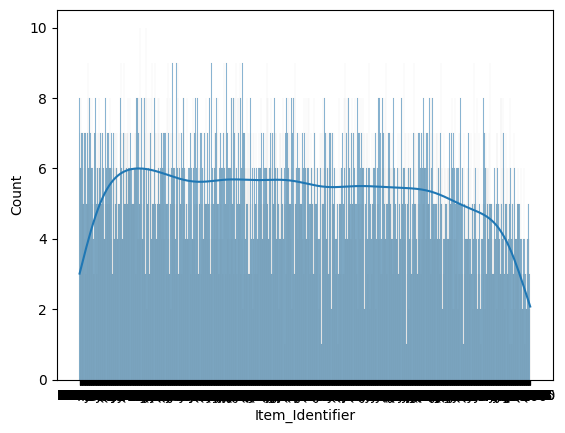

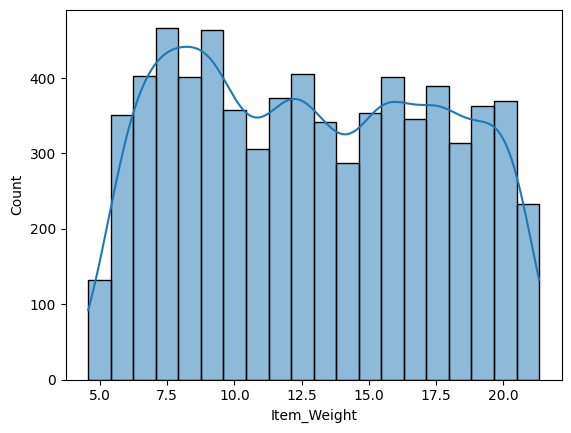

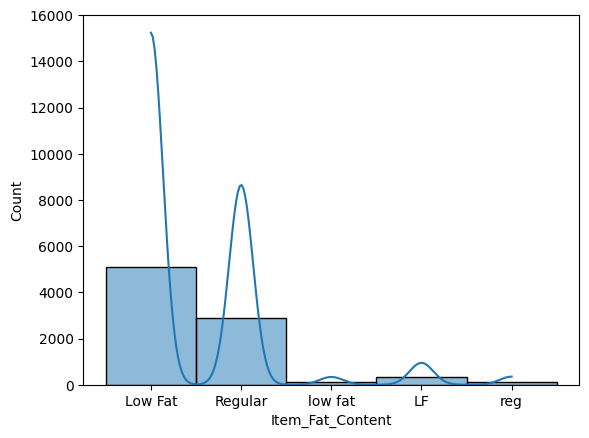

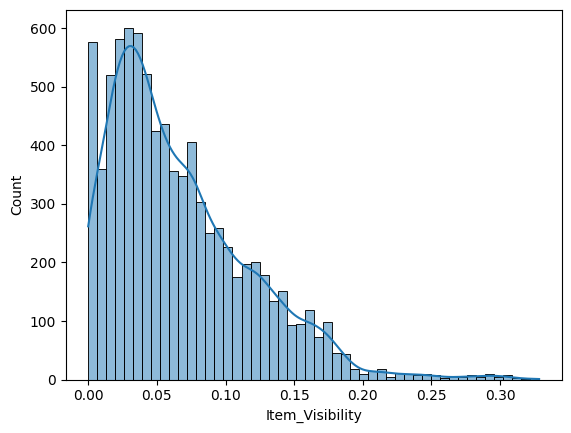

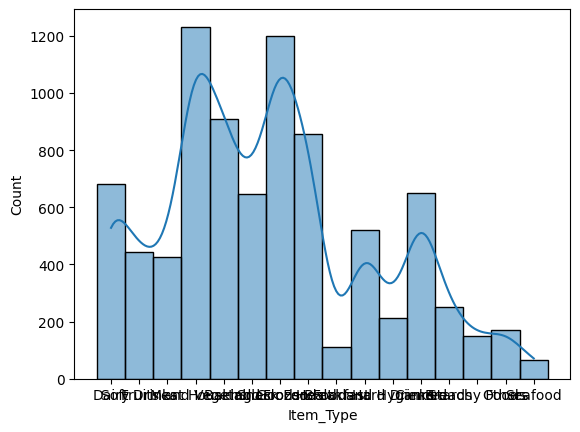

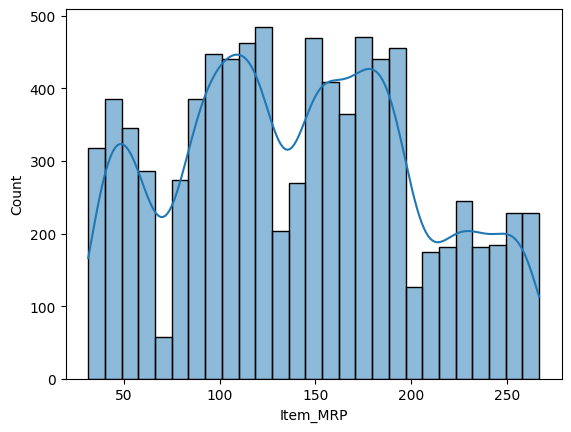

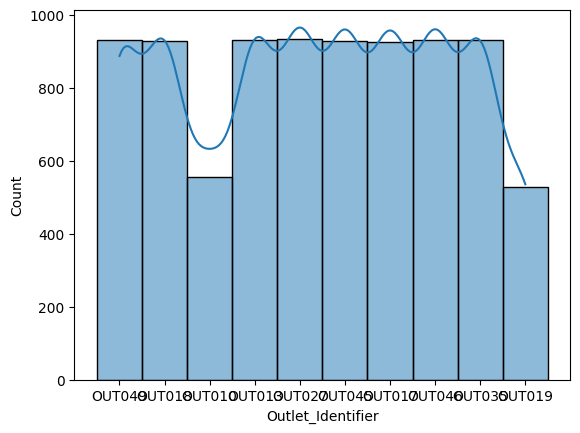

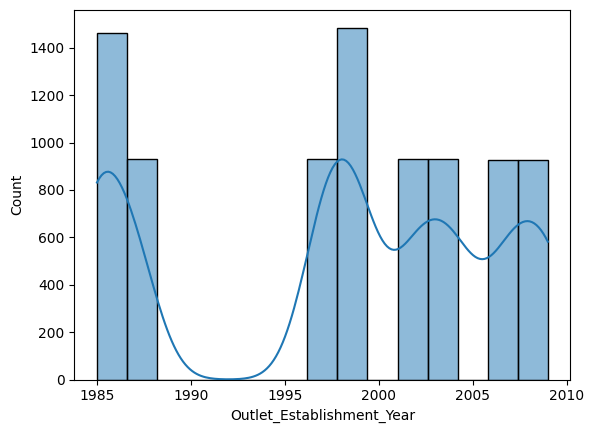

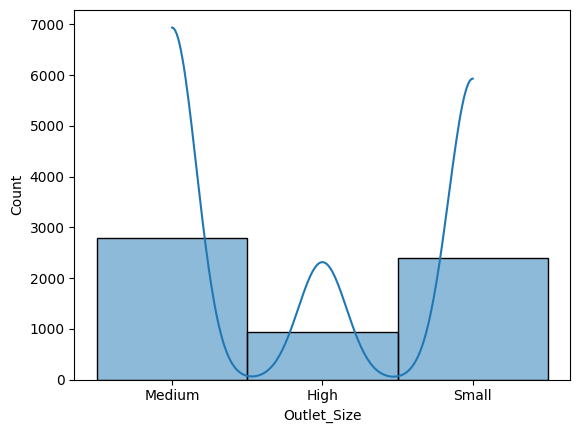

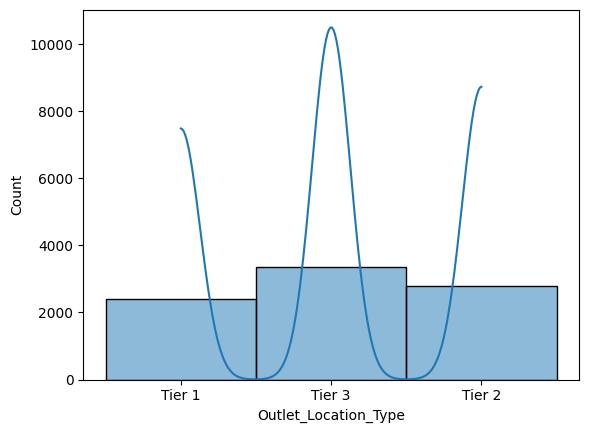

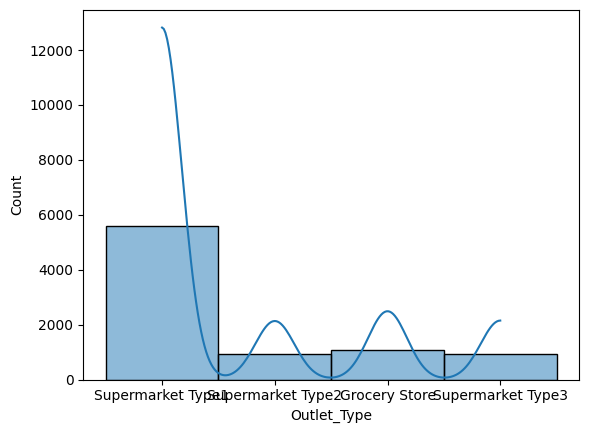

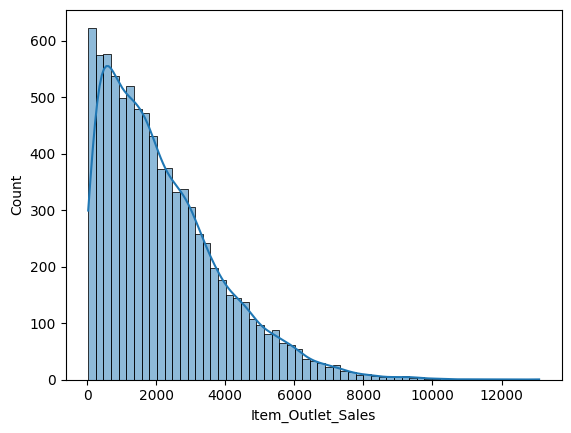

In [66]:
for  i in df.columns:
    sns.histplot(df[i],kde=True)
    plt.show()

# finding null values

In [67]:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

# Filling the null Values

In [68]:
df['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [69]:
df['Item_Weight'].mean()

12.857645184135976

In [70]:
df['Item_Weight'].mode()

0    12.15
Name: Item_Weight, dtype: float64

In [71]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [72]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [73]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [74]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

# Dropping the columns which are not necessary

In [75]:
df=df.drop(["Outlet_Size","Item_Identifier","Outlet_Identifier"], axis=1)

In [76]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [77]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [78]:
df["Outlet_Establishment_Year"] = df["Outlet_Establishment_Year"].astype("category")

In [79]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [80]:
df["Item_Visibility"] = np.log1p(df["Item_Visibility"])

In [81]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.062904,140.992782,2181.288914
std,4.226124,0.047218,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026632,93.826500,834.247400
50%,12.857645,0.052527,143.012800,1794.331000
75%,16.000000,0.090376,185.643700,3101.296400
max,21.350000,0.283968,266.888400,13086.964800


### Seperating numericals and categorical cols

In [82]:
num_cols=df.select_dtypes(include=['int', 'float'])

In [83]:
cat_cols=df.select_dtypes(exclude=['int', 'float'])

In [84]:
num_cols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [85]:
cat_cols.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [86]:
num_cols.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.015920,249.8092,3735.1380
1,5.92,0.019095,48.2692,443.4228
2,17.50,0.016621,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


In [87]:
cat_cols.head()

,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,1999,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,2009,Tier 3,Supermarket Type2
2,Low Fat,Meat,1999,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,1998,Tier 3,Grocery Store
4,Low Fat,Household,1987,Tier 3,Supermarket Type1


# Encoding

In [88]:
cat_cols1=pd.get_dummies(cat_cols, drop_first = True)

In [89]:
cat_cols1.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [90]:
num_cols=num_cols.drop('Item_Outlet_Sales', axis=1)

In [91]:
num_cols.head()

,Item_Weight,Item_Visibility,Item_MRP
0,9.30,0.015920,249.8092
1,5.92,0.019095,48.2692
2,17.50,0.016621,141.6180
3,19.20,0.000000,182.0950
4,8.93,0.000000,53.8614


# Combining all the columns

In [92]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
df_mn = mn.fit_transform(num_cols)

In [93]:
num_cols1 = pd.DataFrame(df_mn, columns=num_cols.columns, index=num_cols.index)

In [94]:
num_cols1.head()

,Item_Weight,Item_Visibility,Item_MRP
0,0.282525,0.056062,0.927507
1,0.081274,0.067243,0.072068
2,0.770765,0.058532,0.468288
3,0.871986,0.000000,0.640093
4,0.260494,0.000000,0.095805


In [95]:
dff=pd.concat([num_cols1,cat_cols1], axis=1)

In [96]:
dff.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.056062,0.927507,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0.081274,0.067243,0.072068,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,0.770765,0.058532,0.468288,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0.871986,0.000000,0.640093,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.260494,0.000000,0.095805,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


<Axes: >

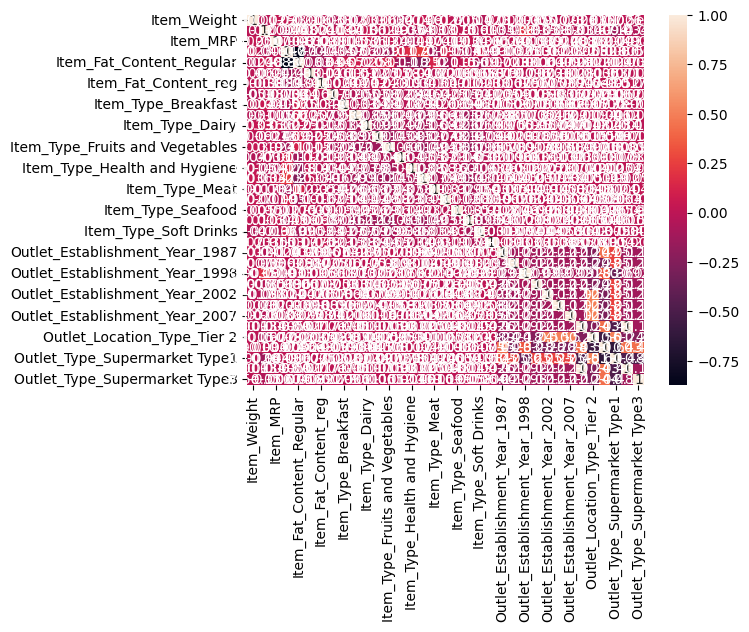

In [97]:
sns.heatmap(dff.corr(),annot=True)

# Selecting Depending and indepedent variables

In [98]:
x=dff
y=df["Item_Outlet_Sales"]

# Splitting Data into train and test data

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 1)

In [100]:
X_train.shape, y_train.shape

((6818, 35), (6818,))

In [101]:
X_test.shape, y_test.shape

((1705, 35), (1705,))

# scaling


# model building

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [104]:
pred = lr.predict(X_test)


In [109]:
y_train_pred=lr.predict(X_train)

## Evaluation

In [116]:
from sklearn.metrics import r2_score, mean_squared_error

In [117]:
print("Test")
r2_score(y_test,pred)

Test


0.5589229938041473

In [118]:
print("Test")
mean_absolute_error(y_test,pred)

Test


853.8290625656102

In [119]:
print("TRAIN")
print(np.sqrt(mean_squared_error(y_train,y_train_pred)))
print(r2_score(y_train,y_train_pred))

TRAIN
1123.4181930691122
0.564523666530776
